About Dataset

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use

Columns M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06 gives sales number of specific drug category as no of units sold

Loading Data

In [39]:
import pandas as pd
file =  'salesdaily.csv'
data = pd.read_csv(file)

Converting Dataset date to proper format for easier time based analysis

In [40]:
data['datum'] = pd.to_datetime(data['datum'], format='%m/%d/%Y')

Infromation of Dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64 

 can be used for checking correlation between sale values
      
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         

can be used for checking correlatio between sales amount and time of sales

First 5 rows

In [42]:
data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


Checking for Missing data

In [43]:
missing = data.isnull().sum()
missing

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

No missing data found

Showing Descriptive statistics

In [44]:
data.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,2016-11-19 12:00:00.000000256,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
min,2014-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,2015-06-12 06:00:00,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,2016-11-19 12:00:00,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,2018-04-29 18:00:00,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,2019-10-08 00:00:00,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000
std,NaN,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547


N02BE section has highest average sales compared to others and also highest maximum sales a day
all has a minimum of 0, so there are days where no unit of each seciton is sold

Plotiing Sales of Drugs over time

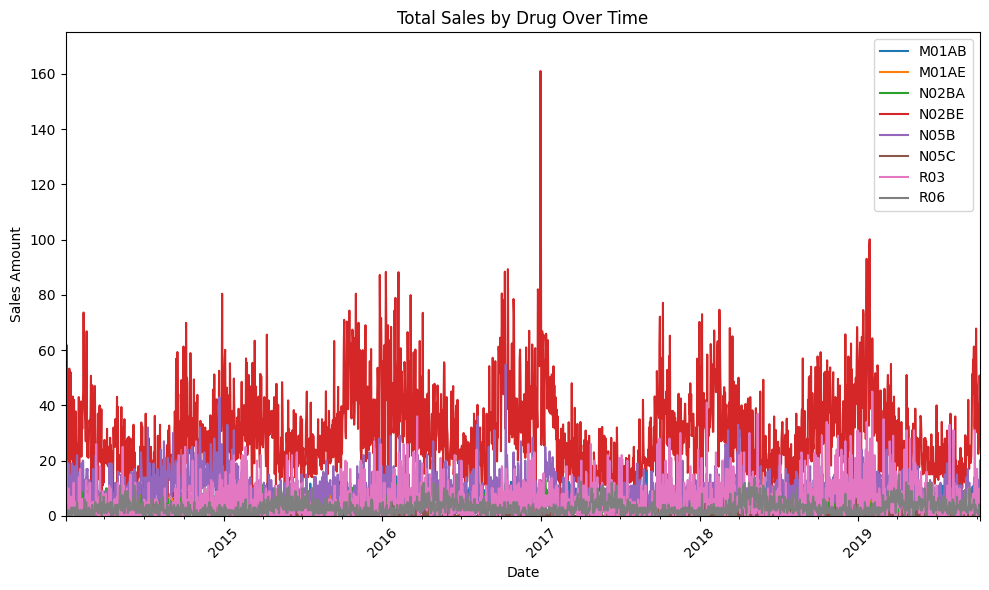

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data_sales = data.drop(columns=['Year', 'Month', 'Hour'])
data_sales.groupby('datum').sum().plot(ax=plt.gca())
plt.title('Total Sales by Drug Over Time')
plt.ylim(0, 175)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

N02BE has consisntent high sales, on which highest sale happend in 2017
R03 and M01AB also have comparitvley higher sales than other drugs excluding N02BE

correlation matrx of Drug Sales

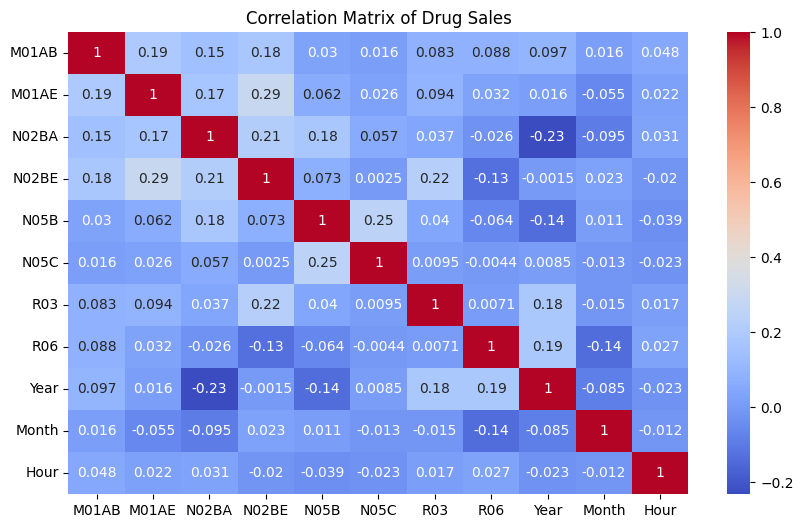

In [49]:
import seaborn as sns
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Drug Sales')
plt.show()

N02BE and M01AE has the highest positive correlation, so their sales caninfluence each other in way that if one increases so does the other
R06 and R03 has the highest positive correlation to the year of sale where as N02BA has the highest negative correlation
